#  Feature Scaling & Feature Engineering

### Assignment (Day 1)

Repeat the steps for the test data and report your results at the bottom of this notebook.

**Requirements:**
- Show the results (MSE, MAE, RMSE) for all models finished during the lecture using the test data.
- Make sure to follow the steps and all additional preprocessing code
- Your results should be displayed at the bottom of this notebook in a single code cell output or markdown cell
- Only progress as far as we progressed in class

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Cost Functions
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Scalers
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

# Feature Engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# Plot style
plt.style.use("seaborn-whitegrid")

In [8]:
# Load Data
df = sns.load_dataset("diamonds")

# original dataset (100 records 80%20%) --> init_train (80 records) and test (20 records)
# init_train (80 records 80%20%) --> train_actual (64 records) and vali (16 records)


# Split Data
train, test = train_test_split(
    df, 
    train_size = .80,
    test_size =.20,
    random_state=42
)

test, val = train_test_split(
    test,
    train_size = .80,
    test_size = .20,
    random_state=42
)

In [9]:
test.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
23029,0.33,Ideal,G,SI1,61.3,56.0,631,4.51,4.46,2.75
37821,0.31,Ideal,E,IF,61.3,58.0,1002,4.37,4.40,2.69
43886,0.54,Ideal,I,VS1,63.1,55.0,1453,5.18,5.22,3.27
27287,2.00,Premium,E,SI2,62.2,56.0,17760,8.14,8.06,5.04
10163,1.05,Good,F,SI1,57.9,62.0,4729,6.68,6.73,3.88


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8630 entries, 23029 to 3831
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    8630 non-null   float64 
 1   cut      8630 non-null   category
 2   color    8630 non-null   category
 3   clarity  8630 non-null   category
 4   depth    8630 non-null   float64 
 5   table    8630 non-null   float64 
 6   price    8630 non-null   int64   
 7   x        8630 non-null   float64 
 8   y        8630 non-null   float64 
 9   z        8630 non-null   float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 565.6 KB


In [11]:
# Model with only numeric features
test.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [12]:
(df.dtypes != "category").values & (df.dtypes != "object").values 

array([ True, False, False, False,  True,  True,  True,  True,  True,
        True])

In [13]:
def cleaner(df):
    
    "Return Only Numeric Features"
    
    # Create boolean array with only columns that are float64
    columns_bool = (df.dtypes != "category").values & (df.dtypes != "object").values 

    # Return only numeric columns
    df = df.iloc[:, columns_bool].dropna()

    return df

test_numeric = cleaner(test)
val_numeric = cleaner(val)

In [14]:
# Create X, y train and validation sets

target = "price"

# feature set --> everything except for price --> X_test
# target set/column --> price --> y_test

X_test = test_numeric.drop(target, axis=1)
y_test = test_numeric[target]

X_val = val_numeric.drop(target, axis=1)
y_val = val_numeric[target]

In [15]:
lr = LinearRegression()
lr.fit(X_test, y_test)
lr.score(X_val, y_val)

0.8636458320968441

In [16]:
lr.coef_

array([10153.3667843 ,   -69.55809394,   -88.32769275, -3680.77388857,
        3830.24795161, -1897.14106976])

In [17]:
lr.intercept_

11033.33399720539

In [18]:
pd.concat([X_test, y_test], axis = 1)

,carat,depth,table,x,y,z,price
23029,0.33,61.3,56.0,4.51,4.46,2.75,631
37821,0.31,61.3,58.0,4.37,4.40,2.69,1002
43886,0.54,63.1,55.0,5.18,5.22,3.27,1453
27287,2.00,62.2,56.0,8.14,8.06,5.04,17760
10163,1.05,57.9,62.0,6.68,6.73,3.88,4729
...,...,...,...,...,...,...,...
8188,1.04,61.8,55.0,6.54,6.50,4.03,4368
15724,1.04,62.6,56.0,6.44,6.41,4.02,6290
2791,0.78,62.5,58.0,5.86,5.89,3.67,3258
33036,0.32,61.6,55.0,4.43,4.47,2.74,814


 # Using Model for one record prediction
 
 ## y = (a x1) + (b x2) + (c x3) + (d x4) + (e x5) + (f x6) + (g x7) + intercept
 
 ### where [a,b,c,d,e,f,g] are the coeffecients from lr.coef_

# predicting resutls from the model

np.round(lr.predict([[1.16, 60.8, 65, 6.78,6.75,4.11]]))

In [20]:
def calc_cost(y_true, y_predict):
    
    "Calculate Cost Functions and print output"
    
    result_dict = {}
    
    mse = mean_squared_error(y_true, y_predict)
    mae = mean_absolute_error(y_true, y_predict)
    rmse = mean_squared_error(y_true, y_predict, squared=False)
    
    ls = [mse, mae, rmse]
    ls2 = ["MSE", "MAE", "RMSE"]
    
    for x in range(len(ls)):
        print(f"{ls2[x]}: {ls[x]}")
        result_dict[ls2[x]] = ls[x]
    
    return result_dict

# Save results to object and print results
print("Baseline")
b_preds = [y_test.mean() for x in range(len(y_test))]
res0 = calc_cost(y_test, b_preds)
print("\nLinear Regression")
res1 = calc_cost(y_test, lr.predict(X_test))

Baseline
MSE: 15836530.251180982
MAE: 3022.1326738894877
RMSE: 3979.5138209561455

Linear Regression
MSE: 2209694.8528981754
MAE: 902.1318082324196
RMSE: 1486.5042391120771


In [21]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Feature Scaling

In [22]:
# Instantiate Scaler Object
scaler = StandardScaler()

# Apply to X data
X_test_scaled = scaler.fit_transform(X_test)
X_val_scaled = scaler.transform(X_val)

# Look at the transformed data
X_test_scaled[:5]

array([[-0.98193623, -0.33198061, -0.64108975, -1.08385949, -1.13679765,
        -1.13504747],
       [-1.02371282, -0.33198061,  0.25147457, -1.20788012, -1.19029251,
        -1.22106688],
       [-0.54328204,  0.9210534 , -1.08737191, -0.49033215, -0.45919618,
        -0.38954597],
       [ 2.506409  ,  0.2945364 , -0.64108975,  2.13181848,  2.07289353,
         2.14802647],
       [ 0.522021  , -2.69882262,  2.0366032 ,  0.8384604 ,  0.88709095,
         0.48498465]])

In [23]:
# Train the model
lr2 = LinearRegression()
lr2.fit(X_test_scaled, y_test)
lr2.score(X_val_scaled, y_val)

0.8636458320968441

In [24]:
res2 = calc_cost(y_val, lr2.predict(X_val_scaled))

MSE: 2198863.4227053868
MAE: 890.2528368132934
RMSE: 1482.8565077934502


In [25]:
res1

{'MSE': 2209694.8528981754,
 'MAE': 902.1318082324196,
 'RMSE': 1486.5042391120771}

In [26]:
lr2.coef_

array([ 4860.7925599 ,   -99.92112621,  -197.91894232, -4155.02092066,
        4296.01847363, -1323.28821348])

In [27]:
pd.DataFrame(X_test_scaled).describe()

,0,1,2,3,4,5
count,8.630000e+03,8.630000e+03,8.630000e+03,8.630000e+03,8.630000e+03,8.630000e+03
mean,-4.711694e-17,2.902635e-15,-4.456330e-16,-1.106093e-15,-2.267016e-16,2.093150e-16
std,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00
min,-1.253484e+00,-7.641346e+00,-2.872501e+00,-5.079096e+00,-5.113248e+00,-5.077604e+00
25%,-8.357182e-01,-4.712066e-01,-6.410898e-01,-9.066871e-01,-9.139024e-01,-9.199990e-01
50%,-2.090693e-01,8.569739e-02,-1.948076e-01,-2.968407e-02,-2.232155e-02,-3.113178e-02
75%,5.011327e-01,5.729884e-01,6.977567e-01,7.144398e-01,7.176906e-01,7.143697e-01
max,6.704956e+00,1.198952e+01,6.945707e+00,3.903542e+00,3.891719e+00,3.968771e+00


#### Looking at the Parameters of the Model (Weights)

We can look at calculated parameters of the model side by side and notice the scales have changed. Looking at the parameters of the model can help us understand which features or more important. 

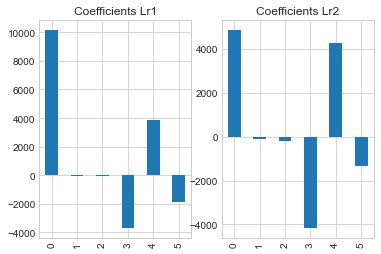

In [28]:
fig, ax = plt.subplots(1,2)

pd.Series(lr.coef_).plot(kind="bar", title="Coefficients Lr1", ax=ax[0])
pd.Series(lr2.coef_).plot(kind="bar", title="Coefficients Lr2", ax=ax[1]);

#### Robust Scaler

Scale features using statistics that are robust to outliers.


In [29]:
# Instantiate Scaler Object
scaler2 = RobustScaler()

# Apply to X data
X_test_robust = scaler2.fit_transform(X_test)
X_val_robust = scaler2.transform(X_val)

# Look at the transformed data
X_test_robust[:5]

array([[-0.578125  , -0.4       , -0.33333333, -0.65027322, -0.68306011,
        -0.6754386 ],
       [-0.609375  , -0.4       ,  0.33333333, -0.72677596, -0.71584699,
        -0.72807018],
       [-0.25      ,  0.8       , -0.66666667, -0.28415301, -0.26775956,
        -0.21929825],
       [ 2.03125   ,  0.2       , -0.33333333,  1.33333333,  1.28415301,
         1.33333333],
       [ 0.546875  , -2.66666667,  1.66666667,  0.53551913,  0.55737705,
         0.31578947]])

In [30]:
# Train the model
lr3 = LinearRegression()
lr3.fit(X_test_robust, y_test)
lr3.score(X_val_robust, y_val)

0.8636458320968442

In [31]:
res3 = calc_cost(y_val, lr3.predict(X_val_robust))

MSE: 2198863.422705386
MAE: 890.252836813293
RMSE: 1482.85650779345


In [32]:
lr2.coef_

array([ 4860.7925599 ,   -99.92112621,  -197.91894232, -4155.02092066,
        4296.01847363, -1323.28821348])

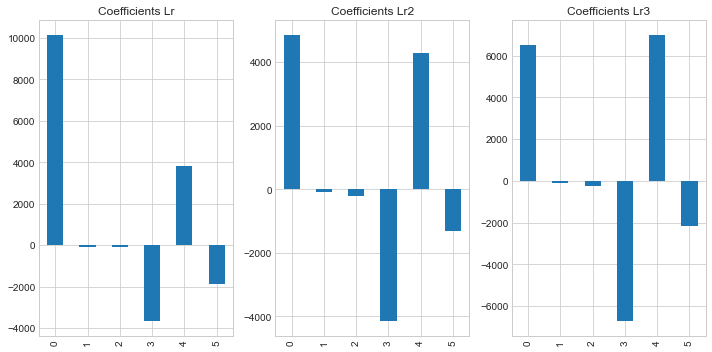

In [33]:
fig, ax = plt.subplots(1,3)

pd.Series(lr.coef_).plot(kind="bar", title="Coefficients Lr", ax=ax[0])
pd.Series(lr2.coef_).plot(kind="bar", title="Coefficients Lr2", ax=ax[1])
pd.Series(lr3.coef_).plot(kind="bar", title="Coefficients Lr3", ax=ax[2], figsize=(10,5))
plt.tight_layout();

#### Min Max Scaler

Transform features by scaling each feature to a given range.


In [34]:
# Instantiate Scaler Object
scaler3 = MinMaxScaler()

# Apply to X data
X_test_mm = scaler3.fit_transform(X_test)
X_val_mm = scaler3.transform(X_val)

# Look at the transformed data
X_test_mm[:5]

array([[0.03412073, 0.37234043, 0.22727273, 0.44477318, 0.44158416,
        0.43581616],
       [0.02887139, 0.37234043, 0.31818182, 0.43096647, 0.43564356,
        0.42630745],
       [0.08923885, 0.43617021, 0.18181818, 0.51084813, 0.51683168,
        0.51822504],
       [0.47244094, 0.40425532, 0.22727273, 0.80276134, 0.7980198 ,
        0.79873217],
       [0.22309711, 0.25177305, 0.5       , 0.65877712, 0.66633663,
        0.61489699]])

In [35]:
# Train the model
lr4 = LinearRegression()
lr4.fit(X_test_mm, y_test)
lr4.score(X_val_mm, y_val)

0.8636458320968442

In [36]:
res4 = calc_cost(y_val, lr4.predict(X_val_mm))

MSE: 2198863.422705386
MAE: 890.252836813294
RMSE: 1482.85650779345


In [37]:
lr4.coef_

array([ 38684.32744819,  -1961.53824911,  -1943.20924054, -37323.04723011,
        38685.50431127, -11970.96015017])

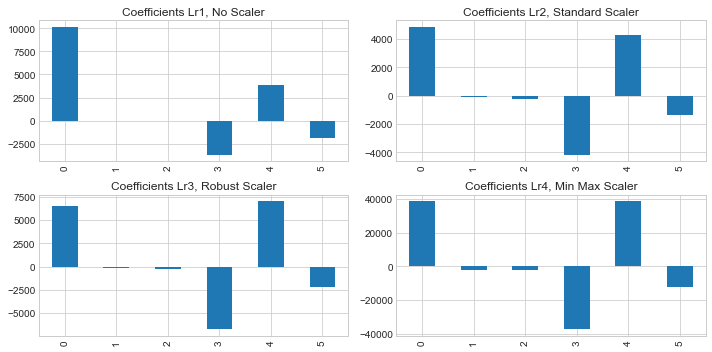

In [38]:
fig, ax = plt.subplots(2,2)

pd.Series(lr.coef_).plot(kind="bar", title="Coefficients Lr1, No Scaler", ax=ax[0,0])
pd.Series(lr2.coef_).plot(kind="bar", title="Coefficients Lr2, Standard Scaler", ax=ax[0,1])
pd.Series(lr3.coef_).plot(kind="bar", title="Coefficients Lr3, Robust Scaler", ax=ax[1,0])
pd.Series(lr4.coef_).plot(kind="bar", title="Coefficients Lr4, Min Max Scaler", ax=ax[1,1], figsize=(10,5))

plt.tight_layout();

## Feature Engineering


In [39]:
test.describe(exclude="number")

,cut,color,clarity
count,8630,8630,8630
unique,5,7,8
top,Ideal,G,SI1
freq,3449,1819,2035


In [40]:
# Create our One Hot Encoder object
one_hot = OneHotEncoder()

col_names = ["color", "clarity"]

# One Hot encode the column
one_hot_df = one_hot.fit_transform(test[col_names]).toarray()
one_hot_df_val = one_hot.transform(val[col_names]).toarray()

In [41]:
# Look at the categories
one_hot.categories_

[array(['D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype=object),
 array(['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'],
       dtype=object)]

In [42]:
# Create column names list for one hot encoded features
column_names = []

for y in range(len(one_hot.categories_)):
    for z in range(len(one_hot.categories_[y])):
        # print(one_hot.categories_[y][z])
        column_names.append(col_names[y]+"_"+one_hot.categories_[y][z])


column_names

['color_D',
 'color_E',
 'color_F',
 'color_G',
 'color_H',
 'color_I',
 'color_J',
 'clarity_I1',
 'clarity_IF',
 'clarity_SI1',
 'clarity_SI2',
 'clarity_VS1',
 'clarity_VS2',
 'clarity_VVS1',
 'clarity_VVS2']

In [43]:
def col_names(one_hot_model):
    
    "Create columns names list for one hot encoded feature"
    
    column_names = []
    
    col_names = ["color", "clarity"]

    for y in range(len(one_hot_model.categories_)):
        for z in range(len(one_hot_model.categories_[y])):
            # print(one_hot.categories_[y][z])
            column_names.append(col_names[y]+"_"+one_hot_model.categories_[y][z])
            
    return column_names

column_names = col_names(one_hot)

In [44]:
# Values for each row
one_hot_df

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [45]:
# Cast One Hot Encoded values into a dataframe

oh_df = pd.DataFrame(
    one_hot_df,
    index=test.index,
    columns = column_names
)

oh_df_val = pd.DataFrame(
    one_hot_df_val,
    index=val.index,
    columns = column_names
)

print(oh_df.shape)
print(oh_df_val.shape)

(8630, 15)
(2158, 15)


In [46]:
# Create train_new df by merging train and one hot encoded df together and drop color and clarity cols
test_new = test.merge(oh_df, on=test.index).set_index("key_0").drop(["color", "clarity"], axis=1)
val_new = val.merge(oh_df_val, on=val.index).set_index("key_0").drop(["color", "clarity"], axis=1)

print(test_new.shape)
print(val_new.shape)

(8630, 23)
(2158, 23)


#### Ordinal Encoder 


In [47]:
ordinal = OrdinalEncoder()

col_names = ["cut"]

# Ordinal encode the column
ordinal_ls = ordinal.fit_transform(test[col_names])
ordinal_ls_val = ordinal.transform(val[col_names])

In [48]:
# Look at categories
ordinal.categories_

[array(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], dtype=object)]

In [49]:
# Add oridnally encoded column to the data
test_new["cut"] = ordinal_ls
val_new["cut"] = ordinal_ls_val

test_new.sample(5)

,carat,cut,depth,table,price,x,y,z,color_D,color_E,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
key_0,,,,,,,,,,,,,,,,,,,,,
45354,0.56,2.0,62.0,56.0,1664,5.27,5.31,3.28,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
22876,1.26,2.0,62.1,57.0,10916,7.01,6.91,4.32,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
41253,0.30,4.0,61.7,59.0,500,4.29,4.33,2.66,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
40592,0.28,2.0,62.2,55.0,497,4.21,4.24,2.63,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
44779,0.59,2.0,62.9,56.0,1622,5.35,5.33,3.36,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


#### Model Using One Hot and Ordinally Encoded Features

In [50]:
target = "price"

X_test = test_new.drop(target, axis=1)
y_test = test_new[target]

X_val = val_new.drop(target, axis=1)
y_val = val_new[target]

In [51]:
lr5 = LinearRegression()

lr5.fit(X_test, y_test)
lr5.score(X_val, y_val)

0.9203328655302125

In [52]:
res5 = calc_cost(y_val, lr5.predict(X_val))

MSE: 1284721.6236307858
MAE: 746.8868988375043
RMSE: 1133.4556116720169


<AxesSubplot:title={'center':'Coefficients Lr5, Features Engineered'}>

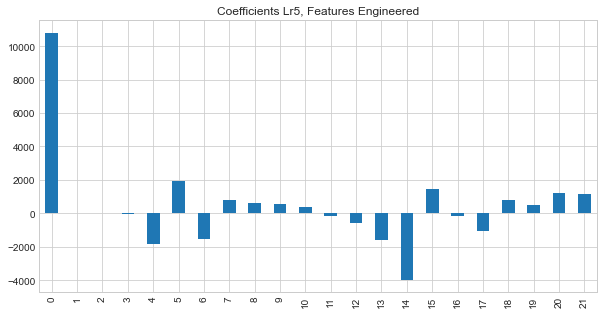

In [53]:
pd.Series(lr5.coef_).plot(kind="bar", title="Coefficients Lr5, Features Engineered",figsize=(10,5))

## Combining Feature Scaling and Feature Engineering

In [54]:
# Make a model with scaled and engineered features

# Change column order to make addition of scaled features easier
col_order_ls = ['carat','depth', 'table', 'x', 'y', 'z', 'cut', 'color_D', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1',
       'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2']

# Re order columns
X_test = X_test[col_order_ls]
X_val = X_val[col_order_ls]

# Replace column values with values from scaled data
X_test[['carat','depth', 'table', 'x', 'y', 'z']] = X_test_scaled
X_val[['carat','depth', 'table', 'x', 'y', 'z']] = X_val_scaled

print(X_test.shape)
X_test.head()

(8630, 22)


,carat,depth,table,x,y,z,cut,color_D,color_E,color_F,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
key_0,,,,,,,,,,,,,,,,,,,,,
23029,-0.981936,-0.331981,-0.641090,-1.083859,-1.136798,-1.135047,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
37821,-1.023713,-0.331981,0.251475,-1.207880,-1.190293,-1.221067,2.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
43886,-0.543282,0.921053,-1.087372,-0.490332,-0.459196,-0.389546,2.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
27287,2.506409,0.294536,-0.641090,2.131818,2.072894,2.148026,3.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
10163,0.522021,-2.698823,2.036603,0.838460,0.887091,0.484985,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [55]:
# Verify that index values match in both datasets
# We expect to see the same number of rows in X_train as the sum value
X_test.shape[0] == sum(X_test.index == y_test.index)

True

In [56]:
# Model
lr6 = LinearRegression()

lr6.fit(X_test, y_test)
lr6.score(X_val, y_val)

0.9203328655302125

In [57]:
res6 = calc_cost(y_val, lr6.predict(X_val))

MSE: 1284721.6236307856
MAE: 746.886898837505
RMSE: 1133.4556116720166


## Percent Decrease in the Cost Function

In [58]:
delta_mse = ((res1['MSE']- res5['MSE'])/res1['MSE'])*100
delta_mae = ((res1['MAE']- res5['MAE'])/res1['MAE'])*100
delta_rmse = ((res1['RMSE']- res5['RMSE'])/res1['RMSE'])*100

delta_ls = [round(delta_mse), round(delta_mae), round(delta_rmse)]
delta_ls2 = ["MSE % decrease", "MAE % decrease", "RMSE % decrease"]
    
for x in range(len(delta_ls)):
    print(f"{delta_ls2[x]}: {delta_ls[x]}")
        
    

MSE % decrease: 42
MAE % decrease: 17
RMSE % decrease: 24


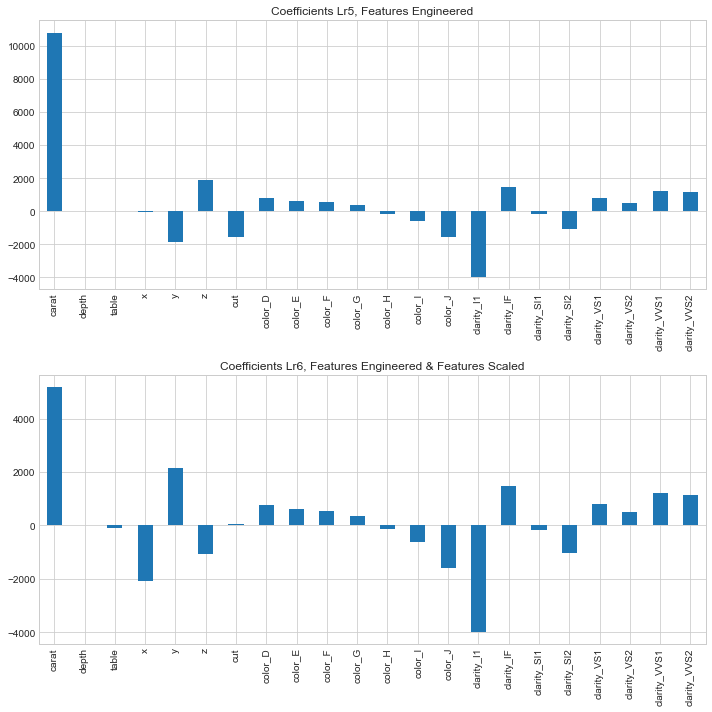

In [59]:
# plot results between scaled and unscaled

fig, ax = plt.subplots(2,1)

pd.Series(lr5.coef_).plot(
    kind="bar",
    title="Coefficients Lr5, Features Engineered",
    ax=ax[0]
)


pd.Series(lr6.coef_).plot(
    kind="bar", 
    title="Coefficients Lr6, Features Engineered & Features Scaled",
    ax=ax[1],
    figsize=(10,10)
)

ax[0].set_xticklabels(X_test.columns)
ax[1].set_xticklabels(X_test.columns)
plt.tight_layout()

## S

- lr.score = 0.8636458320968441

- Baseline
MSE: 15836530.251180982
MAE: 3022.1326738894877
RMSE: 3979.5138209561455


#### Using Model for one record prediction y = (a x1) + (b x2) + (c x3) + (d x4) + (e x5) + (f x6) + (g x7) + intercept
- res 1 
MSE: 2209694.8528981754
MAE: 902.1318082324196
RMSE: 1486.5042391120771

#### Feature Scaling

- lr2.score = 0.8636458320968441
- res 2 
MSE: 2198863.4227053868
MAE: 890.2528368132934
RMSE: 1482.8565077934502

- lr3.score = 0.8636458320968442
- res 3 (Robust Scaler)
MSE: 2198863.422705386
MAE: 890.252836813293
RMSE: 1482.85650779345

- lr4.score = 0.8636458320968442
- res 4 (Min Max Scaler)
MSE: 2198863.422705386
MAE: 890.252836813294
RMSE: 1482.85650779345

#### Feature Engineering

- lr5.score = 0.9203328655302125
- res 5 
MSE: 1284721.6236307858
MAE: 746.8868988375043
RMSE: 1133.4556116720169


#### Combining Feature Scaling and Feature Engineering

- lr6.score = 0.9203328655302125
- res 6 
MSE: 1284721.6236307856
MAE: 746.886898837505
RMSE: 1133.4556116720166

### Percent Decrease in the Cost Function

MSE % decrease: 42
MAE % decrease: 17
RMSE % decrease: 24
